#  AllLife Bank - EDA &Customer Segmentation
## Problem Statement

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer's queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

# Objective

To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank.

# Key questions
- Perform EDA.
- Apply Clustering Algorithms and mentions how many clusters are formed?

### About the Dataset
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call center.

 
### Data Dictionary
- 'Sl_No'- serial nimber of the observation
- 'Customer Key'- Unique ID of customer
- 'Avg_Credit_Limit'- customer credit limit
- 'Total_Credit_Cards'- the total number of credit cards the customer has
- 'Total_visits_bank -customer has contacted the bank for any queries from Bank
- 'Total_visits_online'- customer has contacted the bank for any queries from Online 
- 'Total_calls_made'- customer has contacted the bank for any queries though phone calls

**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.metrics import silhouette_score

#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

**Read the dataset**

## Understanding the structure of the data

### Loading the data set

In [2]:
# reading the csv file
c_df = pd.read_csv('data.csv')
# copying data to varaible 'df' to avoid changes to original data
df = c_df.copy()

In [3]:
## retrieving data of the  first 5 rows
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Checking the shape of the dataset

In [4]:
# retrieving the shape of the dataset
df.shape#shows the shape, i.e the number of rows and columns of the dataset

(660, 7)

- There are 660 customer observations and there are 7 columns/attributes

#### Checking the column names

In [5]:
#Column names
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

- The column names are in good format, no need of adjusting.
- If some columns do not bring value to the model builing , we can drop them.

#### Checking the datatypes

In [6]:
#cheking the datatypes to make sure they are in the correct type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observation**
- All the columns are numeric.
- Sl_No and Customer Key may not be useful for our clustering.

#### Dropping the serial number column as it is just a counter

In [7]:
#dropping the cl.no column
df.drop(['Sl_No'], inplace= True, axis=1)

#### Checking for the unique values

In [8]:
# Lets see unique values 
cols = df.columns
for col in cols:
    print('Unique Values of {} are \n'.format(col),df[col].unique())
    print('*'*100)

Unique Values of Customer Key are 
 [87073 38414 17341 40496 47437 58634 48370 37376 82490 44770 52741 52326
 92503 25084 68517 55196 62617 96463 39137 14309 29794 87241 30507 61061
 24001 68067 65034 14854 81130 29112 13999 32550 82164 61517 28254 30888
 46388 74126 52142 37659 83132 20119 52363 50769 68502 99026 83326 62040
 37252 74625 51182 60301 96386 43886 78503 68419 32828 17937 71632 81566
 29759 36929 70248 91673 61355 60403 85868 76205 66524 69214 21976 35149
 27120 18821 33187 93482 90168 71881 59656 12026 99589 38970 57990 39447
 79694 79403 47296 37559 38165 49198 18007 59619 37016 91099 74704 25742
 11937 52736 88338 18916 92501 96213 26599 73007 97935 26089 14946 74795
 73435 41634 84069 83244 87291 18086 33369 15310 98499 35256 89007 93997
 16577 25440 81116 63663 69811 36111 39454 70199 11602 49697 28701 61627
 34103 14248 31256 45583 52750 95507 23743 53410 53898 66200 58389 61347
 59151 37802 60475 95489 77758 23768 87471 85707 97951 54785 97011 35103
 18564 61009 24

- There is no missing data and also we can drop the customer Id when clustering
- There are 10 unique values in total credit cards.
- There are 5 unique values in visits to the bank
- There are 10 unique values in total calls made.

#### Data pre-processing

### Testing if the dataset has null values

In [9]:
df.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- No null values

- As we have very few attributes, we wil use all of them for our analysis.

#### Analysing the variables of the dataset

In [10]:
# Lets us look at the data summary
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


- There is no column with categorical data
- Looks like few columns are skewed data, further analysis can give more information.
- Customer key column can be dropped

#### Checking for the duplicated records

In [11]:
df.duplicated().sum()

0

No duplicate observations are observed.

#### Dropping the customerkey column

In [12]:
#copying the data as new dataframe after dropping the customer key column
data = df.drop('Customer Key',axis=1).copy()

# Exploratory Data Analysis

## Univariate analysis

In [3]:
#function to calculate measures of spread the range, interquartile range, and standard deviation.
def spread_distribution(feature):
    """
     Function to display the attribute spread values
     like Mean, median, maximum, minimum,IQR,
     skew value and standard deviation
    """
    median=feature.median()# median values per feature
    mean = feature.mean()#mean values of the feature
    minimum=feature.min()#minimum values per feature
    maximum=feature.max()#maximum values per feature
    feature_range= maximum - minimum#range per feature
    skew=feature.skew()#skew per feature
    iqr= feature.quantile(0.75) - feature.quantile(0.25)#IQR per feature
    std= feature.std()#standard deviation per feature
    dict_values={'Minimimum':minimum,'maximum':maximum,'Median':median,'Mean':mean,'Range':feature_range,'IQR':iqr,'Skew':round(skew,3),'Standard deviation':round(std,2)}# dictory with all the values
    values=pd.DataFrame.from_dict(dict_values,orient='index',columns=['Values'])#Constructing DataFrame from dict
    return(values.T)#returning the Dataframe

In [16]:
# make general plots to examine each feature
def plot_var(col_name, full_name):
    """
    Visualize a variable.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
   
    # plot1: counts distribution of the variable
    sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: box plot of the variable
    sns.boxplot(df[col_name],palette="rainbow",data=df)
    #sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_title(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status 
    facet = sns.FacetGrid(df,  size=3, aspect=4)
    facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
    facet.add_legend()  
    
    plt.tight_layout()

### Average Credit Limit

,Minimimum,maximum,Median,Mean,Range,IQR,Skew,Standard deviation
Values,3000.0,200000.0,18000.0,34574.242424,197000.0,38000.0,2.202,37625.49


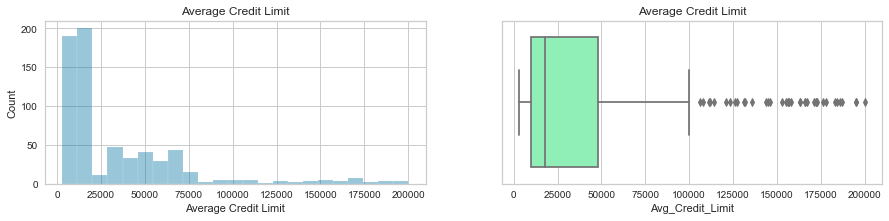

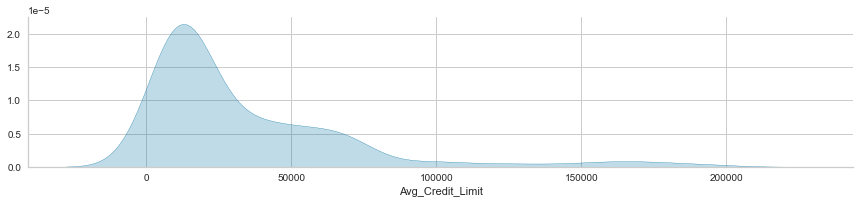

In [17]:
#Calling the above functions to visualize the the attribute
plot_var('Avg_Credit_Limit', 'Average Credit Limit')
spread_distribution(df['Avg_Credit_Limit'])

- Most of the customers are in the first two bins indicating most customers are having credit limits in lower range.
- There are outliers to the higher values.
- The minimum average credit limit is 3000 dollars and the highest is 200000.
- The mean and the median values are 18,000 and 34,574 dollars repectively.
- The data is skewed to the right with a value of 2.2
- This looks like a good indicator for customer clustering.

### Total Credit Cards

,Minimimum,maximum,Median,Mean,Range,IQR,Skew,Standard deviation
Values,1.0,10.0,5.0,4.706061,9.0,3.0,0.145,2.17


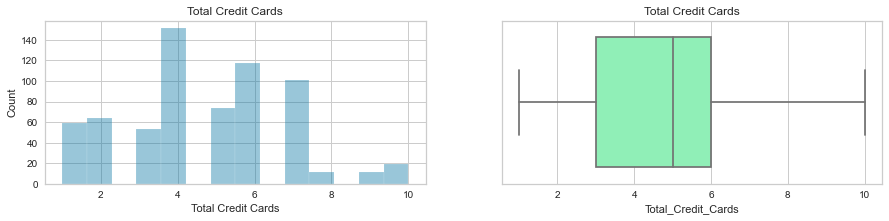

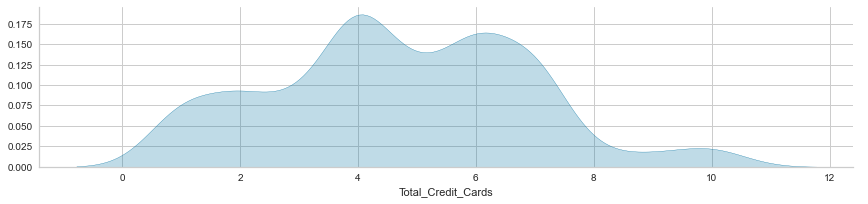

In [18]:
#Calling the above functions to visualize the the attribute
plot_var('Total_Credit_Cards', 'Total Credit Cards')
spread_distribution(df['Total_Credit_Cards'])

- The minimum number of cards held by the customers is 1 and the maximum is 10.
- The median cards held by the customers are around 5.
- The nuber of cards held by customers is also varying, 75% of the customers are holding 6 or less cards.
- So the customers holding credit cards more than 6 are very few.
- Further analysis could give us information if number of cards possed by the customer are influential.

### Total Visits made to the Bank

,Minimimum,maximum,Median,Mean,Range,IQR,Skew,Standard deviation
Values,0.0,5.0,2.0,2.40303,5.0,3.0,0.142,1.63


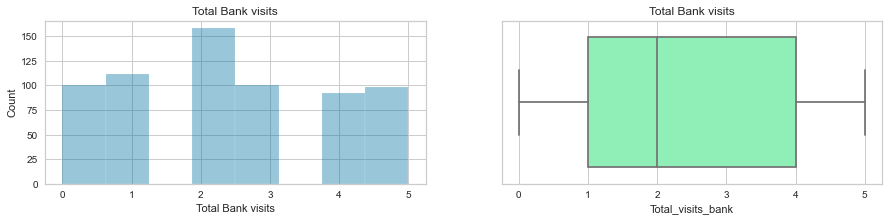

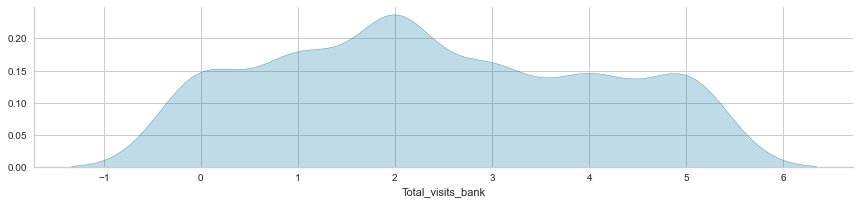

In [19]:
#Calling the above functions to visualize the the attribute
plot_var('Total_visits_bank', 'Total Bank visits')
spread_distribution(df['Total_visits_bank'])

- The number of visits made to the bank are ranging from 0 to 5.
- The average visita are around 2.
- The number of customers making the different choices is almost evenly distributed, with a slight peak at the median value.
- There are no outliers.

### Total Visits by Online

,Minimimum,maximum,Median,Mean,Range,IQR,Skew,Standard deviation
Values,0.0,15.0,2.0,2.606061,15.0,3.0,2.226,2.94


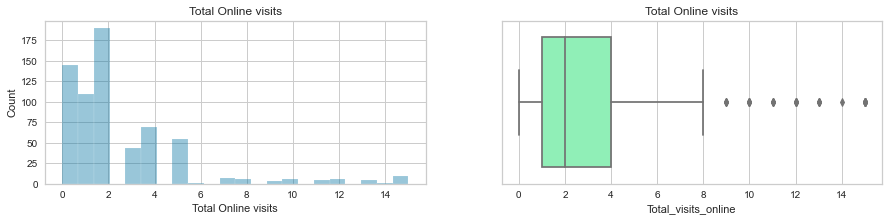

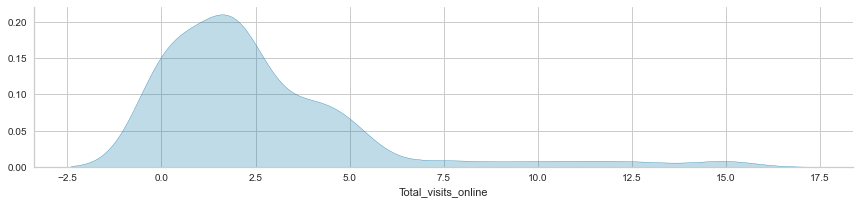

In [20]:
#Calling the above functions to visualize the the attribute
plot_var('Total_visits_online', 'Total Online visits')
spread_distribution(df['Total_visits_online'])

- The online bank visits are ranging from 0 to 15.
- There are outliers to the higher visits, indicating only few customers are making higher online visits.
- There are lot of customers who are in the first five bins, indicating  most customers are having fewer online visits to bank.
- We can use this to distinguisgh the different customers.
- The data is skewed to the right.

### Total Calls Made

,Minimimum,maximum,Median,Mean,Range,IQR,Skew,Standard deviation
Values,0.0,10.0,3.0,3.583333,10.0,4.0,0.659,2.87


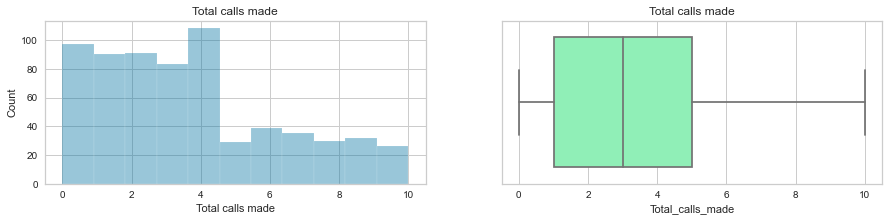

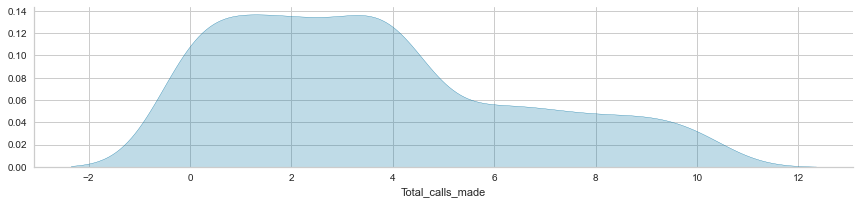

In [21]:
#Calling the above functions to visualize the the attribute
plot_var('Total_calls_made', 'Total calls made')
spread_distribution(df['Total_calls_made'])

- The minimum calls made is 0 and the maximum calls made are 10 and the mean value is around 3.
- There are no outliers.
- The data is skewed to the right. 
- There are more customers who are making calls between 0 and 4.

#### Making a quick glance of all the attributes together

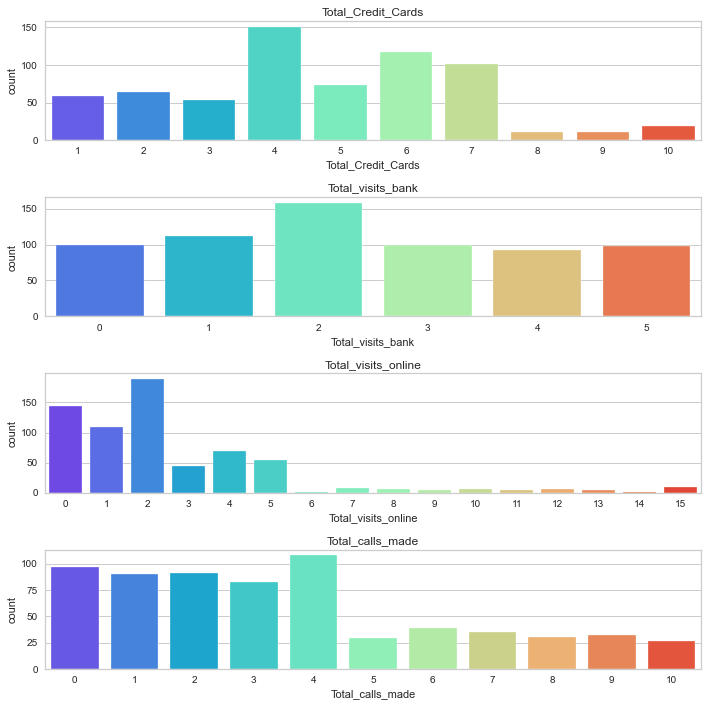

In [22]:
num_list = data.iloc[:,1:].columns.tolist()
plt.figure(figsize=(10,12))

for i, variable in enumerate(num_list):
                     plt.subplot(5,1,i+1)
                     sns.countplot(data[variable],palette="rainbow")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

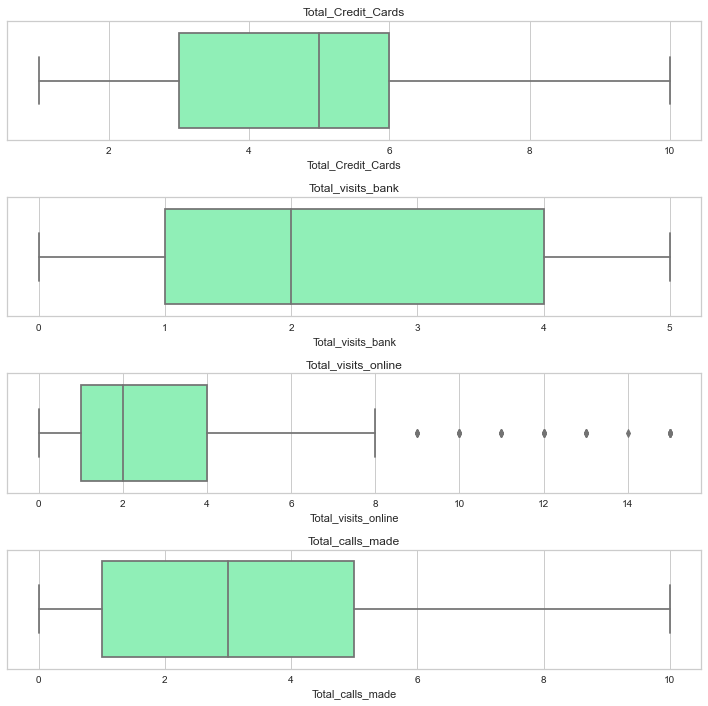

In [23]:
plt.figure(figsize=(10,12))

for i, variable in enumerate(num_list):
                     plt.subplot(5,1,i+1)
                     sns.boxplot(data[variable],palette="rainbow")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations**
- Variables like Total visits online and the Total visits online are right skewed.


# Bivariate Analysis

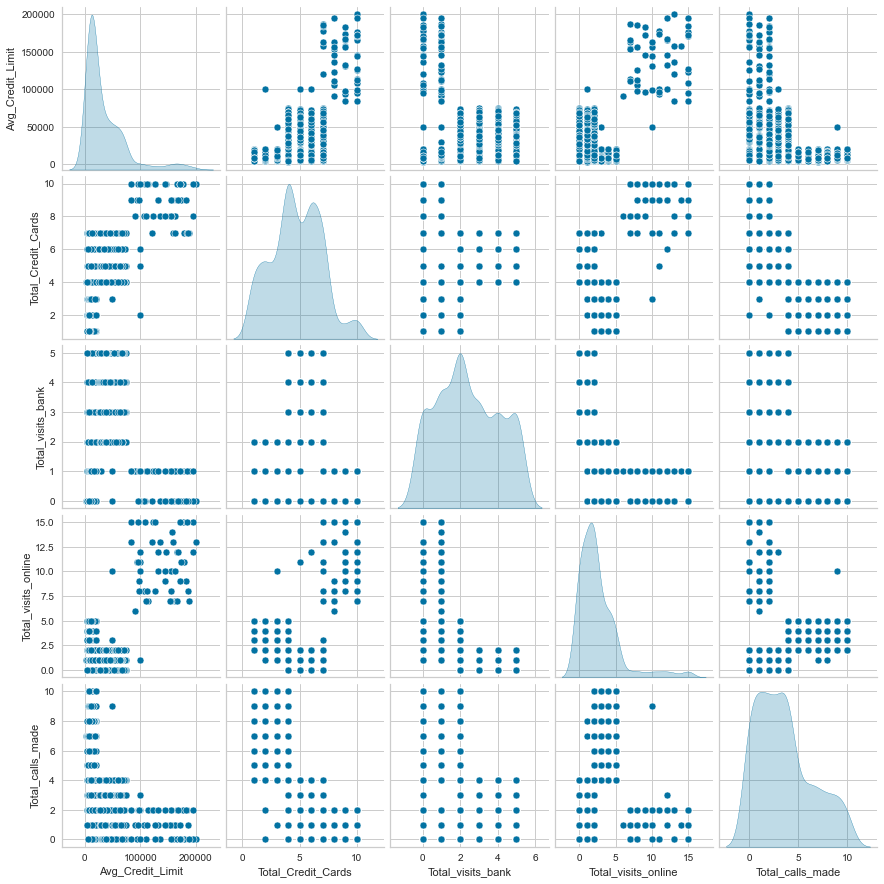

In [24]:
sns.pairplot(data,diag_kind="kde",palette="deep")

- A pattern can be seen in the scatter plots between the average credt limit and the number of credit cards.
- Customer attributes like visiting the bank, online and through a call center are haviing a distict pattern with regrds to the average credit limit.
- We will get a better understanding with further analysis.

### Correlation Matrix

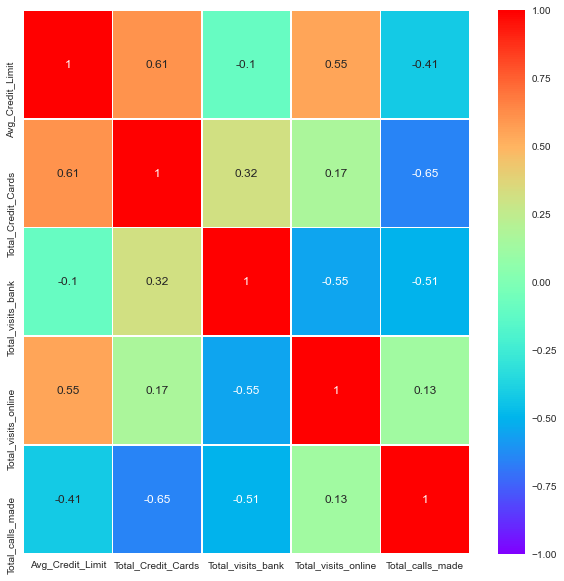

In [25]:
plt.figure(figsize=(10,10))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,
            cmap="rainbow")

plt.show()

**Observations**
- We do not see high correlation among the variables.
- We see moderate correlation between average credit limit and the number of credit cards , which is obviously expected.
- We also see moderate negative correlation between total calls made and total bank visits, indicating there are csutomers who prefer online and not visiting banks.
- Negative correlation is seen between total calls made to attributs like average credit limit, total visits to bank, and total cresit cards.
- Negative correlation is seen with average credit limit to calls made and visits to the bank but it has positive correlation with number of credit cards and the online visits. May be indicating, higher credit limit customers are preferring online bank visits.

#### Multivariate analysis for Average Credit Limit Vs Total Visits Online with hue of Number of Credit Cards

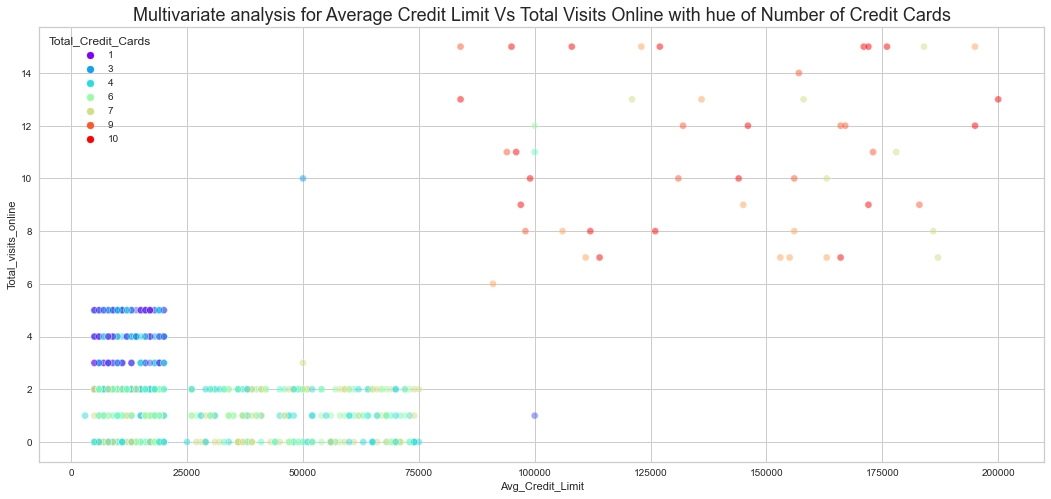

In [26]:
plt.figure(figsize=(18,8))# specifying the size of figure
#scatterplot with 3 variables
ax=sns.scatterplot(x=("Avg_Credit_Limit"), y='Total_visits_online',hue='Total_Credit_Cards',data=df,sizes=(40, 400), alpha=.5, palette="rainbow", x_jitter=True,y_jitter=True);
ax.set_title('Multivariate analysis for Average Credit Limit Vs Total Visits Online with hue of Number of Credit Cards', fontsize=18)#title
plt.show()

- There is a distinct customer behavior of customers depending on their average credit card balance.
- Customers with the higher average credit limit are making higher visits to the online and also those customers are having higher number of credit cards.
- Customers with 4 to 7 credit cards are having wider range of the average credit limits than the customers with 1-4 cards.
- As seen with the correlation values, as the credit limits are increasing, the customers credit cards are increasing and also the number of online visits are increasing.

### Multivariate analysis for Total online visits Vs Total calls made

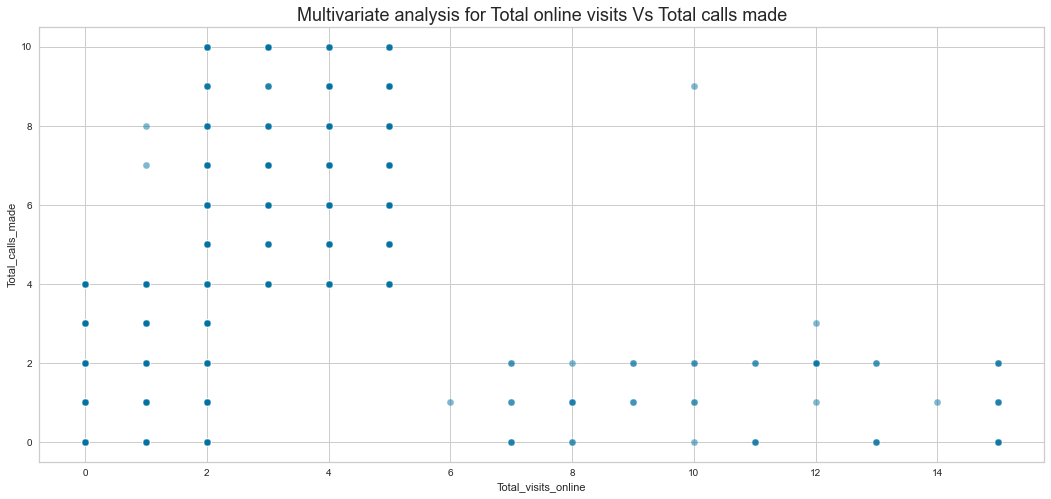

In [27]:
plt.figure(figsize=(18,8))# specifying the size of figure
#scatterplot with 3 variables
ax=sns.scatterplot(x='Total_visits_online', y='Total_calls_made',data=df,sizes=(40, 400),palette='rainbow', alpha=.5, x_jitter=True,y_jitter=True);
ax.set_title('Multivariate analysis for Total online visits Vs Total calls made', fontsize=18)#title
plt.show()

- Here total calls made are compared to the online visits.
- A vivd pattern is observed depending on the number of calls a customer makes.
- The number of calls are very few as the online visits are the highest, also, the calls made by the lowest online visits are few when compared to the customers who are making 3 to 5 online visits.
- The highest calls are made by customers who are on average making 3 to 5 online visits.

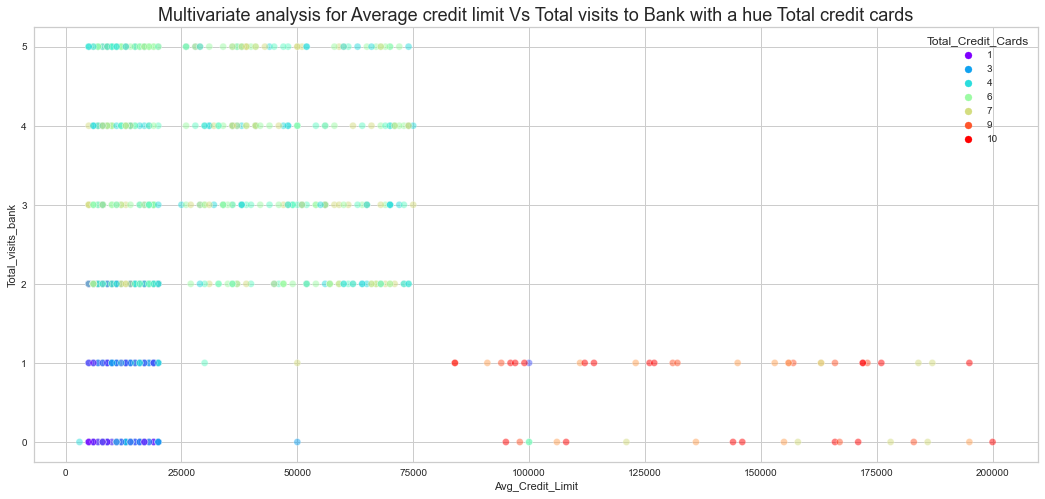

In [28]:
plt.figure(figsize=(18,8))# specifying the size of figure
#scatterplot with 3 variables
ax=sns.scatterplot(x='Avg_Credit_Limit', y='Total_visits_bank',hue = 'Total_Credit_Cards',palette="rainbow",data=df,sizes=(40, 400), alpha=.5, x_jitter=True,y_jitter=True);
ax.set_title('Multivariate analysis for Average credit limit Vs Total visits to Bank with a hue Total credit cards', fontsize=18)#title
plt.show()

- Total visits to the bank are lowest among the customers with low credit average and also towards the very higher range of average credit limit.
- The highest visits to the bank are among the customers with having a average credit card balances.
- Also, we can observe that among the customers who are making lower visits to the bank are having credit cards less than 3 or having higest number of credit cards.
- Customers who are having credit cards between 6 to 7 are making more visits to the bank.

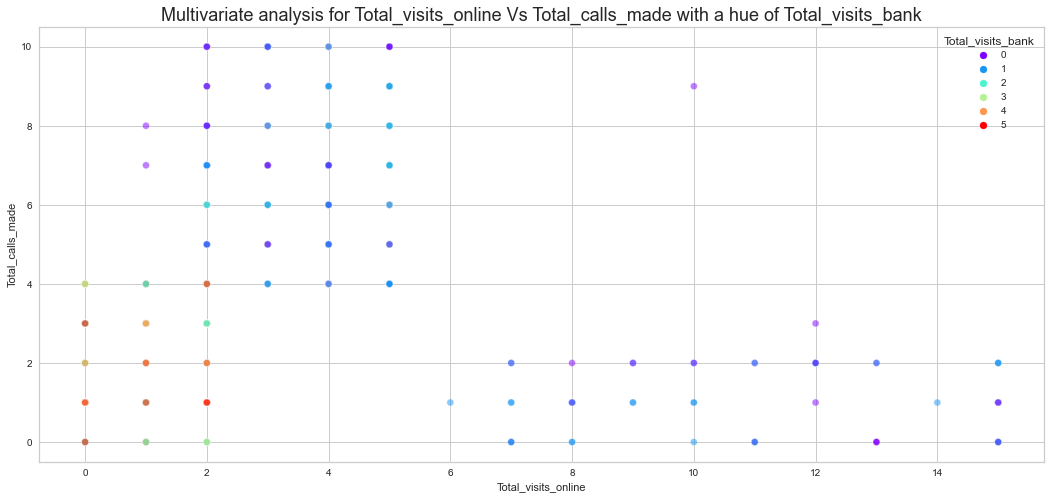

In [29]:
plt.figure(figsize=(18,8))# specifying the size of figure
#scatterplot with 3 variables
ax=sns.scatterplot(x='Total_visits_online', y='Total_calls_made',hue='Total_visits_bank',palette="rainbow",data=df,sizes=(40, 400), alpha=.5, x_jitter=True,y_jitter=True);
ax.set_title('Multivariate analysis for Total_visits_online Vs Total_calls_made with a hue of Total_visits_bank', fontsize=18)#title
plt.show()

- Customers who are having low calls made to bank are the customers with higher bank visits. But the customers  with higher visits online are also the customers making low calls.
- Customers who are making low calls are either visiting bank or using online visits.
- Customers who are making high calls are in the lowest levels of visiting bank or who are making fewer online visits.


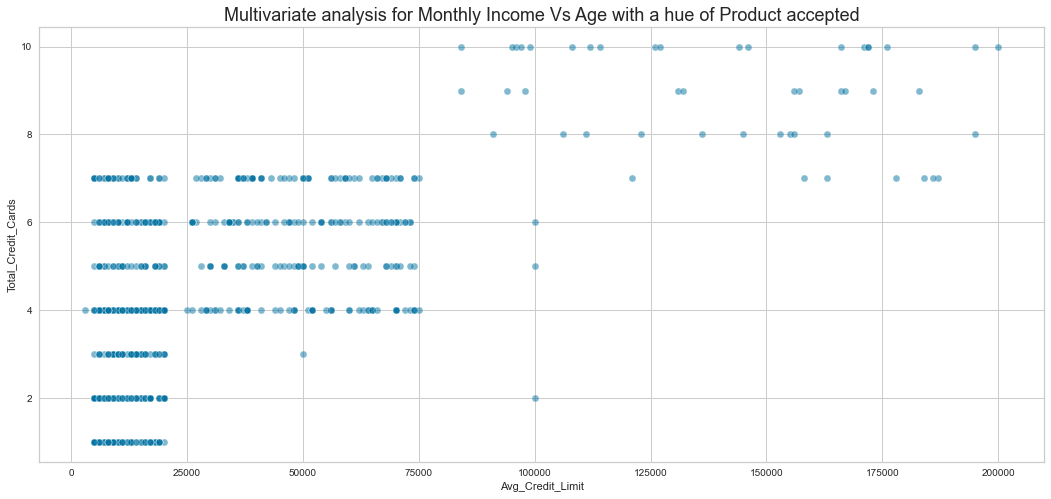

In [30]:
plt.figure(figsize=(18,8))# specifying the size of figure
#scatterplot with 3 variables
ax=sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards',palette="rainbow",data=df,sizes=(40, 400), alpha=.5, x_jitter=True,y_jitter=True);
ax.set_title('Multivariate analysis for Monthly Income Vs Age with a hue of Product accepted', fontsize=18)#title
plt.show()

### 3D scatter plots for better visualization of the data

#### 3D scatter plot with Avg_Credit_Limit, Total_Credit_Cards, Total_Visits_online

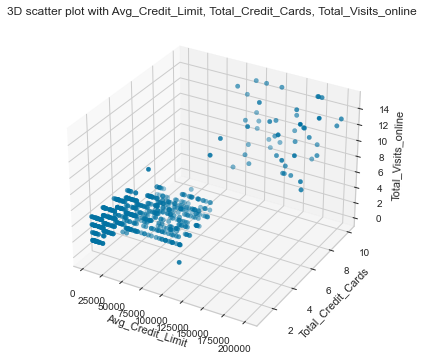

In [30]:
from mpl_toolkits.mplot3d import Axes3D 
# 3D plotting for 3 variables
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Avg_Credit_Limit"], df["Total_Credit_Cards"], df["Total_visits_online"])
ax.set_xlabel("Avg_Credit_Limit")
ax.set_ylabel("Total_Credit_Cards")
ax.set_zlabel("Total_Visits_online");
ax.set_title('3D scatter plot with Avg_Credit_Limit, Total_Credit_Cards, Total_Visits_online');

- 

#### 3D scatter plot with Avg_Credit_Limit, Total_Visits_online, Total_visits_bank

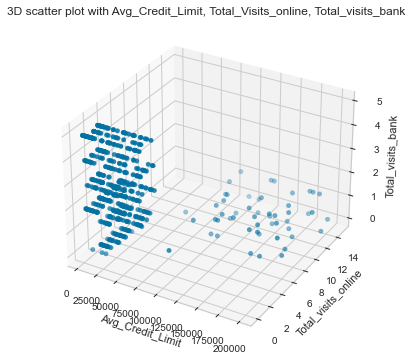

In [32]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Avg_Credit_Limit"], df["Total_visits_online"], df["Total_visits_bank"])
ax.set_xlabel("Avg_Credit_Limit")
ax.set_ylabel("Total_visits_online")
ax.set_zlabel("Total_visits_bank");
ax.set_title('3D scatter plot with Avg_Credit_Limit, Total_Visits_online, Total_visits_bank');

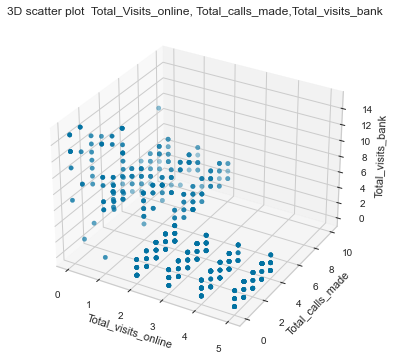

In [33]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Total_visits_bank"], df["Total_calls_made"], df["Total_visits_online"])
ax.set_xlabel("Total_visits_online")
ax.set_ylabel("Total_calls_made")
ax.set_zlabel("Total_visits_bank");
ax.set_title('3D scatter plot  Total_Visits_online, Total_calls_made,Total_visits_bank');

- Three distinct clusters of the customers are seen as per their choice with the way they visit the bank, or visit online or make calls.
- There are no major extreme outliers are observed in the above scatter plots

## Outlier treatment

- we are also using Manhattan distance for our modeling, which minimizes the effect of outliers.
- There may be a scenario where outliers can form separate segments which could be useful for the business.
- Most of the attributes are not having extreme outliers.
- For the attributes that have outliers , the information looks useful for customer degmentation.
- Hence not doing a outlier treatment.

## Standardize the data

In [14]:
from sklearn.preprocessing import StandardScaler
# Using the standard sclar to standardize the data.
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


- 

## Prior to using segmentation model to select a cluster number lets plot the data using t-SNE  
 - It’s purely for exploration
 - It does not preserve the inputs like PCA and the values may often change between runs.
 - Features from higher dimension will be displayed in 2 Dimensions.

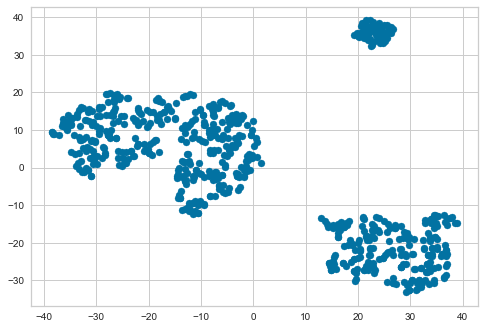

In [15]:
from sklearn.manifold import TSNE
# Fit and transform with a TSNE
tsne = TSNE(n_components=2, random_state=5)
#Project the data in 2D
df_2d = tsne.fit_transform(scaled_df)


xs = df_2d[:,0]
# Select the 1st feature: ys
ys = df_2d[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys)
plt.show()



- We are seeing three distinct clusters
- Here we are observing the data in 2 dimensions , reduced from its original 5 dimensions.
- We can build our future models by choosing our n_clusters as 3.

## K-Means Clustering

- We know the clustering could be into 3 groups for the K-Means clustering( as per earlier analysis with t-SNE and EDA)
- lets see how the clustering choice going to look like with the K-means clustering technique using different scores.

### Let us fit with different cluster values.
- ranging from 1 to 8, 1 cluster would be the whole dataset.
- before we confirm the clusters to be 3
- after measuring the best values

In [34]:
#making a copy of the scaled df
scaled_df1= scaled_df.copy()
scaled_df.drop('HC_Clusters',axis=1,inplace=True)

In [35]:
# Measuring average distortion  after fitting the Kmeans with range of cluster choices from 1 to 8
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(scaled_df)
    prediction=model.predict(scaled_df)
    distortion=sum(np.min(cdist(scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)



Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9429789712808515
Number of Clusters: 7 	Average Distortion: 0.9092311283834433
Number of Clusters: 8 	Average Distortion: 0.8907666316830039


#### Using the Elbow method to find the optimal number of clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

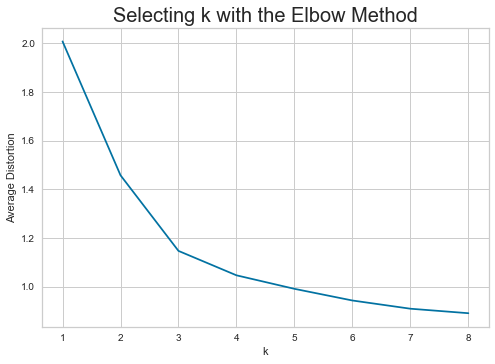

In [36]:
#plotting the cluster with the mean distortions
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

- Appropriate k seems to be 3 as there is a sharp bend.

## Silhouette scores
#### Silhouette Score is one of the popular approaches for taking a call on the optimal number of clusters. It is a way to measure how close each point in a cluster is to the points in its neighboring clusters.
- Higher the value of Silhouette Score indicates observations are well clustered.

In [37]:
# Measuring the silhouette scores using k values from 2 to 9
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2726898791817692
For n_clusters = 6, silhouette score is 0.25583657571102003
For n_clusters = 7, silhouette score is 0.24847787091758058
For n_clusters = 8, silhouette score is 0.22778081646796788
For n_clusters = 9, silhouette score is 0.22481756476453027


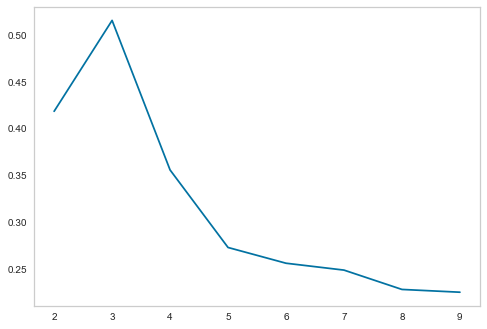

In [38]:
#Plotting the scores
plt.plot(cluster_list,sil_score)
plt.grid()

- Score is highest for 3. We will choose the K as 3.

### Visualizing the Silhouette scores and clusters
- Finding optimal no. of clusters with silhouette coefficients

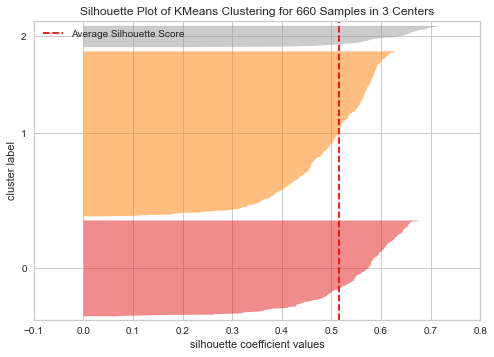

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [80]:
#Finding optimal no. of clusters with silhouette coefficients and visualizing the clusters
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(scaled_df)    
visualizer.show()

- The clusters are well formed and the score is high

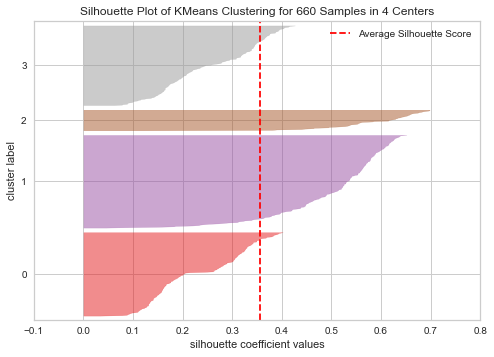

In [81]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(scaled_df)    
visualizer.show();

- The score has gone down.
- The cluster 2 has become very thin, may it is containg very few customers.

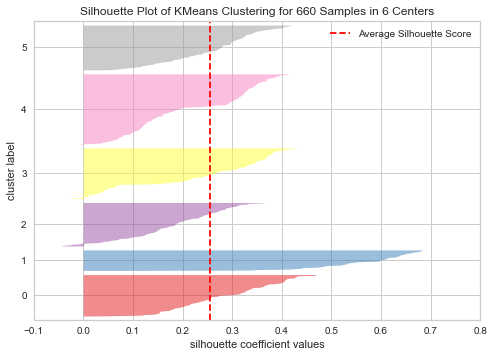

In [82]:
#Finding optimal no. of clusters with silhouette coefficients and visualizing the clusters
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(scaled_df)    
visualizer.show();

- The score has further reduced.
- Some clusters are having negative values.

#### Final decision on number of clusters
- We will choose 3 as the number of clusters.
- we can observe that as the clusters are increasing, the silhouette values are decreasing and the each cluster population is going down, not a good strategy for customer segmentation.

### KMeans Clustering with k choice as 3

In [68]:
%%time
# lets us take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_df)

Wall time: 50.3 ms


KMeans(n_clusters=3, random_state=0)

In [69]:
# Storing the cluster lables in the dataframe
data['K_means_segments'] = kmeans.labels_
scaled_df['K_means_segments'] = kmeans.labels_

In [41]:
#grouping the data with clusters and creating cluster profile with median values
cluster_profile3 = scaled_df.groupby('K_means_segments').median()
cluster_profile4 = data.groupby('K_means_segments').median()


In [42]:
type(cluster_profile3 )

pandas.core.frame.DataFrame

### Visualizing the clusters from 5 dimensions of the data set to 2 dimensions using the t-SNE

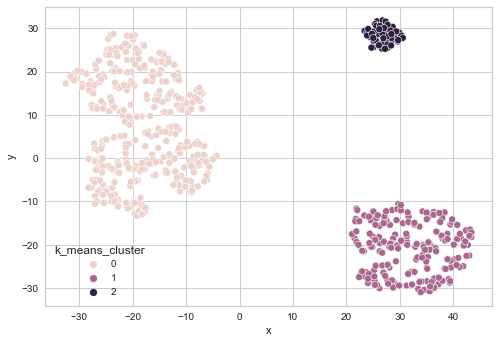

In [73]:
from sklearn.manifold import TSNE

tsne_data = TSNE(n_components=2,random_state=5).fit_transform(scaled_df)
tsne_data = pd.DataFrame(tsne_data)
tsne_data.columns = ['x', 'y']
tsne_data['k_means_cluster'] = kmeans.labels_

tsne_data.head(2)
sns.scatterplot(data=tsne_data, x='x', y='y', hue='k_means_cluster');


In [43]:
#separating the dataset 
X = scaled_df[scaled_df.columns[0:-1]]
y = scaled_df[scaled_df.columns[-1]]
#Project the data in 2D,Fit X into an embedded space and return that transformed output..
knn_df_2d = TSNE(n_components=2, random_state=5).fit_transform(X)
#Shape of the dataframe
knn_df_2d.shape

(660, 2)

#### Plotting

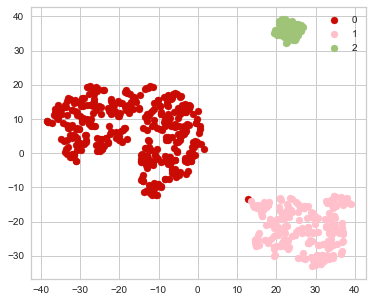

In [44]:
#getting the unquie cluster values
target_ids = range(len(y.unique()))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'pink', 'g'
for i, c, label in zip(target_ids, colors, y.unique()):
    plt.scatter(knn_df_2d[y == i, 0], knn_df_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

- The cluster separation into 3 distinct groups can be seen.
- Here data is displayed in 2 dimensions from the original 5 dimensions.

### Cluster profiling using the Kmeans values/lables

In [45]:
cluster_profile3['count_in_each_segments'] = scaled_df.groupby('K_means_segments')['Avg_Credit_Limit'].count().values
cluster_profile4['count_in_each_segments'] = data.groupby('K_means_segments')['Avg_Credit_Limit'].count().values

In [46]:
# lets display cluster profile
cluster_profile4.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,31000,6,3,1,2,386
1,12000,2,1,4,7,224
2,145500,9,1,11,1,50


-  The profile values are similar to the values obtained earlier with Hierarchical  clustering.
- Cluster profile is displayed in the above table using the median values for each cluster.
- Cluster 0 has the highest count among all the clusters. They are belonging to the middle tier with the Average Credit  Limit, and total credit cards. Their preferred form of contact with bank is by visiting the bank.
- Cluster 1 is belonging to the low tier in terms of Average credit card limit, and total number of credit cards. The preferred form of contact with bank is by calls to the call center.
- Cluster 2 has the highest Average Credit limit, and highest number of total credit cards. They are  using the online  as  preferred form of contact.

#### Visualization of the customer attributes as per K Means clusters

<AxesSubplot:xlabel='K_means_segments'>

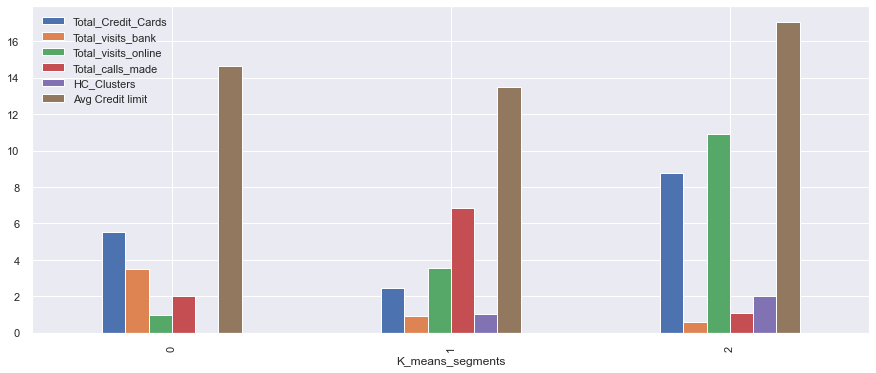

In [105]:
#Plotting the bar graph as per clusters
data.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

### Boxplotting the customer attributes - from kmeans algorithm

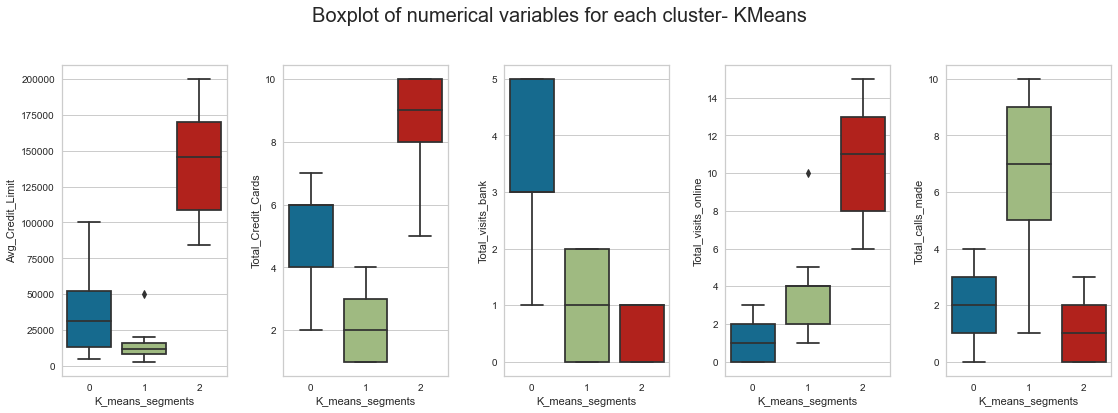

In [97]:
all_col = ['Avg_Credit_Limit','Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online',
       'Total_calls_made']
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster- KMeans', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data[all_col[counter]],x=data['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

-The cluster profiles are same as the ones obtained by the Hierarchical  clusters.
### Insight- KMeans clustering
- **Cluster 0**
   - For the customers belonging to the cluster 0, the median values for the average credit limit is 31,000.
   - Cluster 0 has customers who are carrying 2 to 7 credit cards with a median value of 6 cards.
   - Customers belonging to the cluster 0 are making the most bank visits. The visits are ranging from 1 to 5, with a median of 3 visits. 
   - The cluster 0 customers are preferring to visit the bank more often than others.
   - Cluster 0 customers are making the the lowest online visits to bank, not more than 3. Few are making no online visits.
   - The cluster 0 customers are making a median of 2 calls, ranging from 0 to 4 calls maximum.
   - The number of customers in this cluster are 386
   
- **Cluster 1**
   
    - The lowest values for the average credit card limit belongs to the cluster 1
    - Cluster 1 customers are having the lowest number of credit cards, a median of 2. 
    - Clustomers of the cluster 1 are either not visiting the bank or making a visit once or twice.
    - Cluster 1 customers are making atleast one online visit and the highest visits they are making is maximum at 5.
    - The highest calls are made by the cluster 1 customers. The values are ranging from 1 to 10. With a median value of 7 calls. 
    - The cluster 1 customers preferred contact is by calls.
    - The number of customers in this cluster are 224.
    

- **Cluster 2**
    - The customers belonging to the Cluster 2 have the highest average credit limit.The median values are around 145,500. Much higher than the other cluster values.
    - The cluster 2 has higher number of credit cards.
    - Customers of the cluster 2 are either not visiting the bank or just making a one visit. This cluster customers are making the least visits to bank.
    - Customers of cluster 2 are making the the most online visits, they are ranging from 6 to 15 with a median value of 9 visits, way higher than other groups.Online visits are most preferred by cluster 2 customers.
    - The customers of cluster 2 are making the lowest calls ranging from 0 to 3.
    - The number of customers in this cluster are 50.
    - These customers have higher average credit limit, more total credit cards and preferred contact is online visits.
